In [326]:
import numpy as np
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from pmdarima import auto_arima                        
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse

from statsmodels.tsa.arima_model import ARIMA


import warnings

from matplotlib import pyplot

# from pyramid.arima import auto_arima
from pandas.plotting import autocorrelation_plot
from math import sqrt



In [292]:
trainData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_train.csv",  parse_dates=[0])
testData = pd.read_csv("../parse_tactics/normalized_tva_server_1_tactic_1_test.csv", parse_dates=[0])

trainData['timestamp'] = trainData.timestamp.dt.ceil(freq='s')
testData['timestamp'] = testData.timestamp.dt.ceil(freq='s')
trainData = trainData[['timestamp','latency']]
testData = testData[['timestamp','latency']]

trainData.to_csv('dummyDataTrain.csv', index=False )
testData.to_csv('dummyDataTest.csv', index=False )

In [293]:
def parsealldate(x):
    timestamp = pd.datetime.strptime(x,'%Y-%m-%d %H:%M:%S')
#     timestamp = timestamp.dt.ceil(freq='s') 
    return timestamp

In [312]:
trainData = pd.read_csv("./dummyDataTrain.csv", date_parser=parsealldate, parse_dates=[0], squeeze=True,header=0, index_col=0)
testData = pd.read_csv("./dummyDataTest.csv", date_parser=parsealldate, parse_dates=[0], squeeze=True,header=0, index_col=0)

# pd.(trainData)


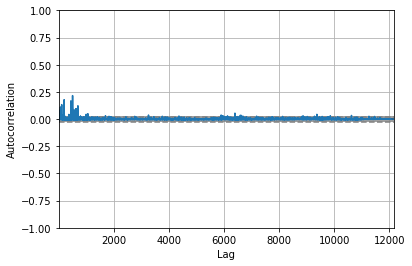

In [297]:
autocorrelation_plot(trainData)
# trainData

In [299]:
trainData.index = trainData.index.to_period('S')


In [338]:
model = ARIMA(trainData, order=(1,1,4))
model_fit = model.fit()

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/tsa/base/tsa_model.py:583: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [340]:
print(model_fit.summary())

model_fit.save?

                             ARIMA Model Results                              
Dep. Variable:              D.latency   No. Observations:                12156
Model:                 ARIMA(1, 1, 4)   Log Likelihood               50440.735
Method:                       css-mle   S.D. of innovations              0.004
Date:                Thu, 18 Feb 2021   AIC                        -100867.471
Time:                        16:19:34   BIC                        -100815.631
Sample:                             1   HQIC                       -100850.092
                                                                              
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const           -1.175e-08    1.1e-06     -0.011      0.991   -2.17e-06    2.14e-06
ar.L1.D.latency    -0.4148        nan        nan        nan         nan         nan
ma.L1.D.latency    -0.5566      

/usr/local/lib/python3.7/site-packages/statsmodels/tsa/arima_model.py:1521: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(np.diag(-inv(hess)))


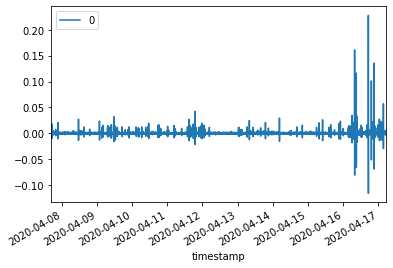

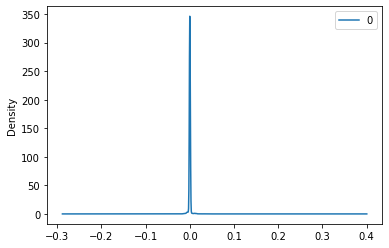

                  0
count  1.215600e+04
mean   7.878072e-09
std    4.627938e-03
min   -1.161063e-01
25%   -6.664275e-04
50%   -7.363355e-05
75%    5.962980e-04
max    2.280718e-01


In [320]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [321]:
model_fit.forecast()

(array([0.01583637]), array([0.00462775]), array([[0.00676615, 0.02490659]]))

In [324]:
history = [x for x in trainData]

In [325]:
predictions = list()
# walk-forward validation
for t in range(len(testData)):
    
    model = ARIMA(history, order=(1,1,0))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = testData[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts


/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: 

NameError: name 'sqrt' is not defined

In [344]:
rmse = sqrt(mean_squared_error(testData, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
# pyplot.plot(testData)
# pyplot.plot(predictions, color='red')
# pyplot.show()

Test RMSE: 0.004


m

In [341]:
model.fit?

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=nan sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=732969.916, Time=7.79 sec


LinAlgError: Array must not contain infs or NaNs

In [ ]:
model.

In [197]:
testData['timestamp'][0]

Timestamp('2020-04-17 05:33:51.000157')